# Prática Independente: Feature Engineering e validação de modelos.

### Feature Engineering.

#### Exercício 1: Acesse o link com a [lista das montanhas mais altas do mundo](https://en.wikipedia.org/wiki/List_of_highest_mountains_on_Earth) e crie um dicionário para as cinco primeiras, em termos de altura, contendo dados sobre `Mountain`, `Height`, `First Ascent` e `Country`.

In [1]:
ListDicts = [{'Mountain': 'Everest', 'Height': 8.848, 'First Ascent': 1953, 'Country': 'Nepal-China'},
             {'Mountain': 'K2', 'Height': 8.611, 'First Ascent': 1954, 'Country': 'Paquistan-China'},
             {'Mountain': 'Kangchenjunga', 'Height': 8.586, 'First Ascent': 1955, 'Country': 'Nepal-China'},
             {'Mountain': 'Lhotse', 'Height': 8.516, 'First Ascent': 1956, 'Country': 'Nepal-China'},
             {'Mountain': 'Makalu', 'Height': 8.485, 'First Ascent': 1955, 'Country': 'Nepal-China'}
            ]

#### Exercício 2: Aplique a técnica `one hot-encoding` à lista de dicionários recém criados, para gerar a "dummiezação" das variáveis categóricas.

In [116]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse = False, dtype = int)
print(vec.fit_transform(ListDicts))

X = vec.fit_transform(ListDicts)
print(vec.get_feature_names())

[[   1    0 1953    8    1    0    0    0    0]
 [   0    1 1954    8    0    1    0    0    0]
 [   1    0 1955    8    0    0    1    0    0]
 [   1    0 1956    8    0    0    0    1    0]
 [   1    0 1955    8    0    0    0    0    1]]
['Country=Nepal-China', 'Country=Paquistan-China', 'First Ascent', 'Height', 'Mountain=Everest', 'Mountain=K2', 'Mountain=Kangchenjunga', 'Mountain=Lhotse', 'Mountain=Makalu']


#### Exercício 3: Recupere os nomes dos atributos "dummiezados" e os inspecione.

In [117]:
vec.get_feature_names()

['Country=Nepal-China',
 'Country=Paquistan-China',
 'First Ascent',
 'Height',
 'Mountain=Everest',
 'Mountain=K2',
 'Mountain=Kangchenjunga',
 'Mountain=Lhotse',
 'Mountain=Makalu']

#### Exercício 4: Calcule a matriz esparsa dos dados.

In [118]:
vec = DictVectorizer(sparse = True, dtype = int)
vec.fit_transform(ListDicts)
print(vec.fit_transform(ListDicts))

  (0, 0)	1
  (0, 2)	1953
  (0, 3)	8
  (0, 4)	1
  (1, 1)	1
  (1, 2)	1954
  (1, 3)	8
  (1, 5)	1
  (2, 0)	1
  (2, 2)	1955
  (2, 3)	8
  (2, 6)	1
  (3, 0)	1
  (3, 2)	1956
  (3, 3)	8
  (3, 7)	1
  (4, 0)	1
  (4, 2)	1955
  (4, 3)	8
  (4, 8)	1


### Validação de modelos.

#### Exercício 5: A partir das definições a seguir, construra a validação dos modelos a serem aplicados para ajustar os pontos criados.

In [120]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [121]:
def PolynomialRegression(degree = 2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs)
                        )

In [122]:
import numpy as np

def make_data(N, err = 1.0, rseed = 15):
    '''
    randomly sample the data 
    '''
    rng = np.random.RandomState(rseed)
    
    X = rng.rand(N, 1) ** 2
    y = 15 - 1.1 / (X.ravel() + 0.05)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

In [123]:
X, y = make_data(100)
print(X)
print(X.ravel())

[[7.20491483e-01]
 [3.20037520e-02]
 [2.95535907e-03]
 [1.30710048e-01]
 [7.58456715e-02]
 [2.80900238e-01]
 [9.35863830e-02]
 [9.27046354e-02]
 [1.24861128e-02]
 [6.24495171e-02]
 [8.42044629e-01]
 [6.97735601e-02]
 [5.15199066e-01]
 [7.49462520e-01]
 [6.51377291e-01]
 [4.43315479e-02]
 [2.79702316e-02]
 [2.18148702e-03]
 [1.55411866e-03]
 [4.00923772e-02]
 [9.97088927e-01]
 [1.38970131e-01]
 [5.78375877e-01]
 [2.24178048e-01]
 [2.59809693e-01]
 [8.93097610e-01]
 [1.19785688e-02]
 [2.16311648e-01]
 [2.00378916e-02]
 [2.89819390e-01]
 [8.94001966e-02]
 [2.89169921e-01]
 [4.43060019e-01]
 [1.32735475e-01]
 [3.88152200e-01]
 [4.13095278e-01]
 [1.76384729e-01]
 [1.62604461e-01]
 [1.52428031e-01]
 [1.64989928e-01]
 [6.34668835e-03]
 [3.22978545e-03]
 [6.13573125e-03]
 [4.83967616e-01]
 [8.50245001e-04]
 [2.49492677e-01]
 [1.75918622e-02]
 [9.45908995e-04]
 [4.08946729e-01]
 [1.98914348e-01]
 [9.49858094e-01]
 [1.08745570e-01]
 [3.81908615e-02]
 [4.67919221e-01]
 [1.23270408e-01]
 [5.944966

(-2, 20)

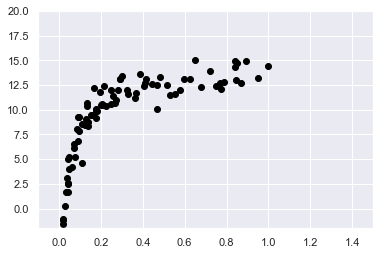

In [124]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting

plt.scatter(X.ravel(), y, color = 'black')
axis = plt.axis()

plt.xlim(-0.1, 1.5)
plt.ylim(-2, 20)

#### Exercício 5 (continuação): Teste os graus `[1, 3, 5, 7, 9]` para os pontos gerados.

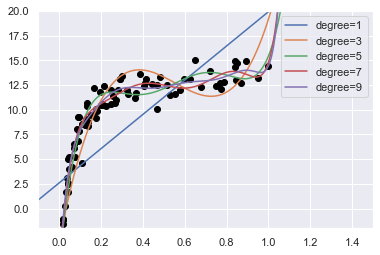

In [125]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting

X_test = np.linspace(-0.1, 1.1, 500).reshape(-1,1)

plt.scatter(X.ravel(), y, color = 'black')
axis = plt.axis()
for degree in [1, 3, 5, 7, 9]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label = 'degree={0}'.format(degree))
plt.xlim(-0.1, 1.5)
plt.ylim(-2, 20)
plt.legend(loc = 'best');

#### Exercício 5 (continuação): Escolha o grau que melhor ajusta a regressão aos pontos.

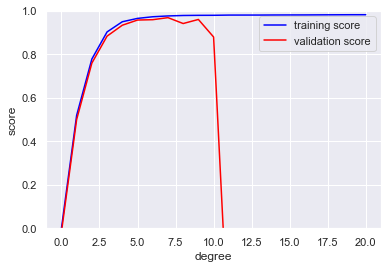

In [126]:
from sklearn.model_selection import validation_curve

degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), 
                                          X, 
                                          y, 
                                          'polynomialfeatures__degree', 
                                          param_range = degree, 
                                          cv = 7
                                         )

plt.plot(degree, np.mean(train_score, axis = 1), color = 'blue', label = 'training score')
plt.plot(degree, np.mean(val_score, axis = 1), color = 'red', label = 'validation score')
plt.legend(loc = 'best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

#### Exercício 5 (continuação): Plote os pontos gerados e a curva de ajuste final.

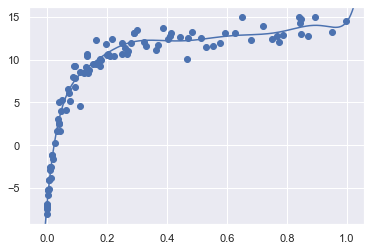

In [127]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(9).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test)
plt.axis(lim);